<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/classification_shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.duplicated().sum()

np.int64(240)

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


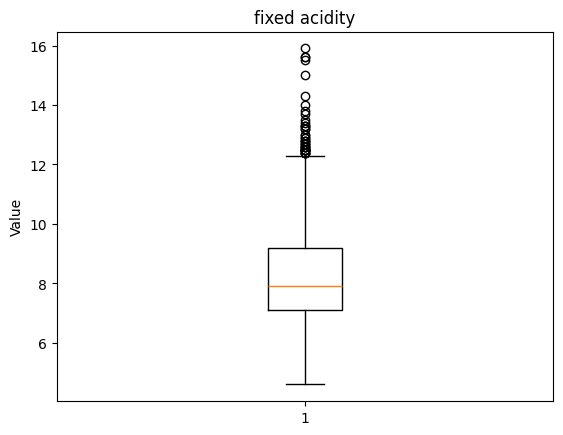

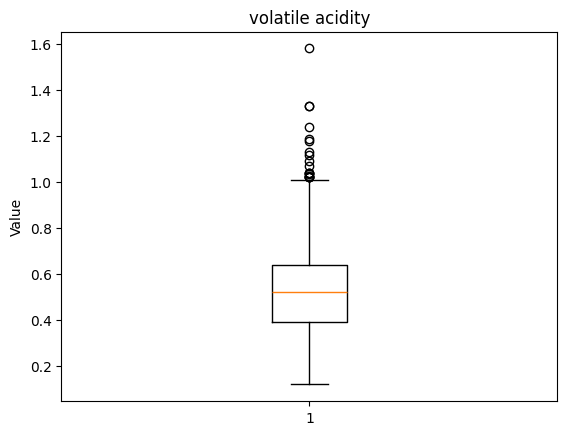

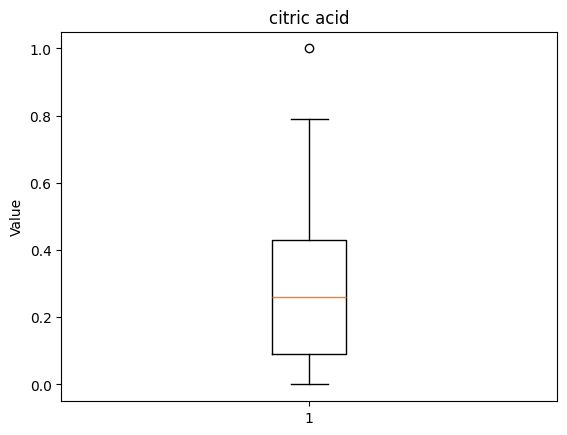

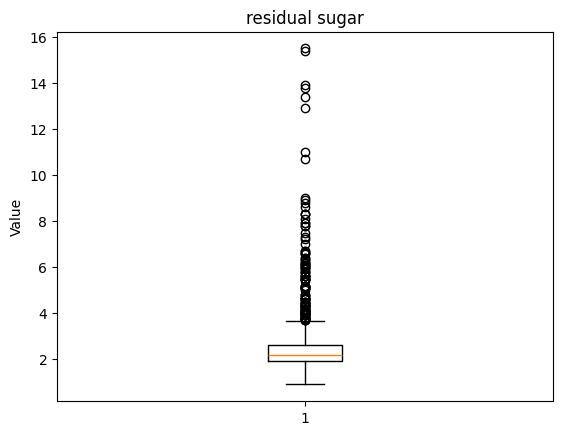

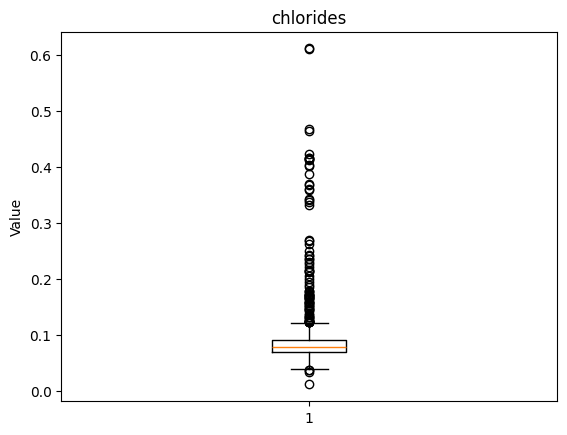

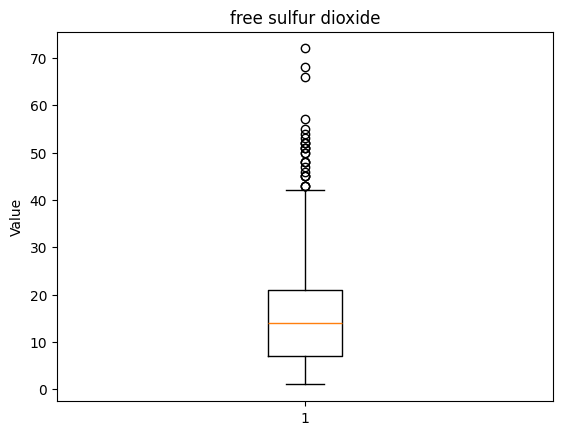

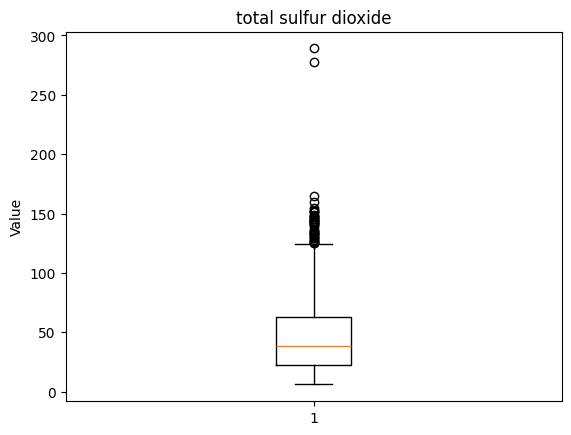

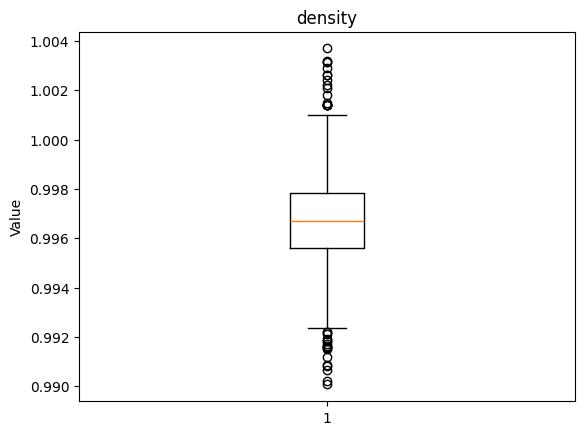

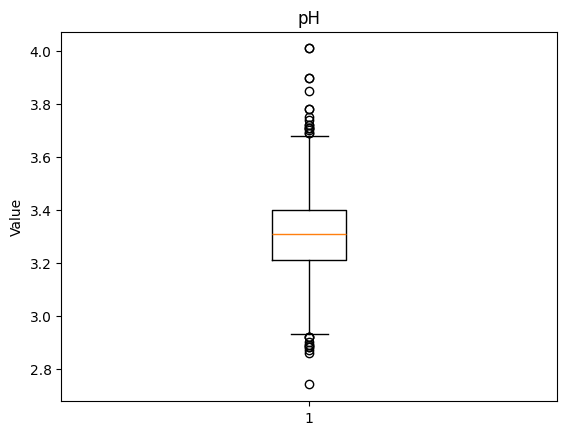

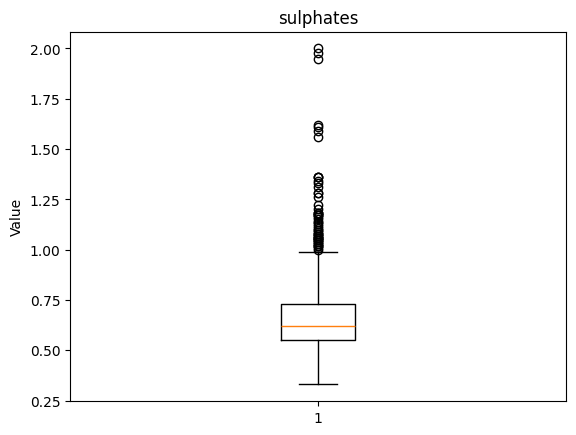

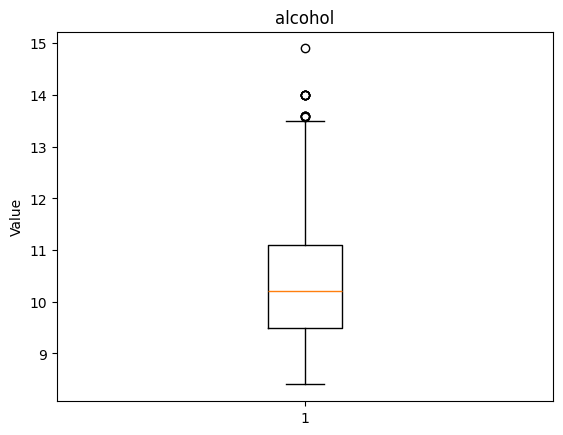

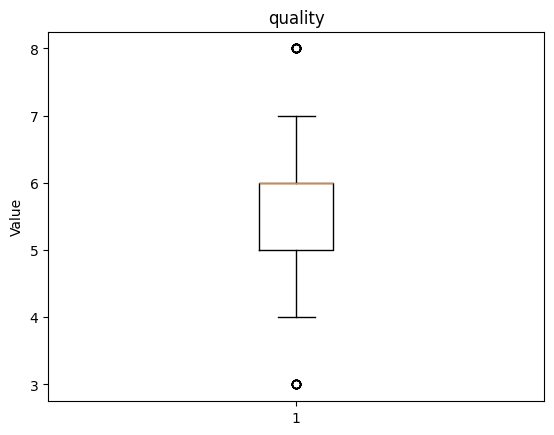

In [11]:
for i in df.columns:
  if df[i].dtype in ['int64', 'float64']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.ylabel('Value')
    plt.show()

In [12]:
df['fixed acidity'] = np.log1p(df['fixed acidity'])
df['residual sugar'] = np.log1p(df['residual sugar'])
df['chlorides'] = np.log1p(df['chlorides'])
df['sulphates'] = np.log1p(df['sulphates'])

In [13]:
c = df['volatile acidity'].values
winsor = winsorize(c,limits = [0,0.05])
df['volatile acidity'] = winsor

In [14]:
c = df['free sulfur dioxide'].values
winsor = winsorize(c,limits = [0,0.05])
df['free sulfur dioxide'] = winsor

In [15]:
c = df['total sulfur dioxide'].values
winsor = winsorize(c,limits = [0,0.05])
df['total sulfur dioxide'] = winsor

In [16]:
c = df['density'].values
winsor = winsorize(c,limits = [0.05,0.05])
df['density'] = winsor

In [17]:
q1 = np.quantile(df['citric acid'],0.25)
q3 = np.quantile(df['citric acid'],0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 +1.5*IQR
df['citric acid'] = df['citric acid'].clip(lower=lower_bound, upper =upper_bound)

In [18]:
q1 = np.quantile(df['pH'],0.25)
q3 = np.quantile(df['pH'],0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 +1.5*IQR
df['pH'] = df['pH'].clip(lower=lower_bound, upper =upper_bound)

In [19]:
q1 = np.quantile(df['alcohol'],0.25)
q3 = np.quantile(df['alcohol'],0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 +1.5*IQR
df['alcohol'] = df['alcohol'].clip(lower=lower_bound, upper =upper_bound)

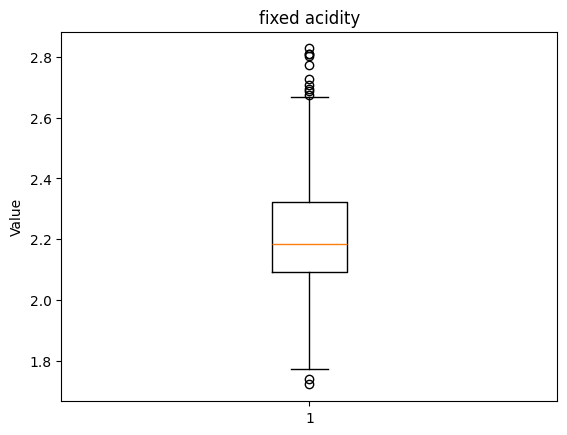

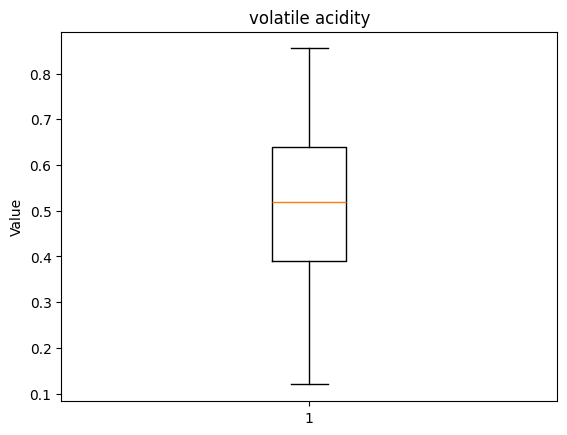

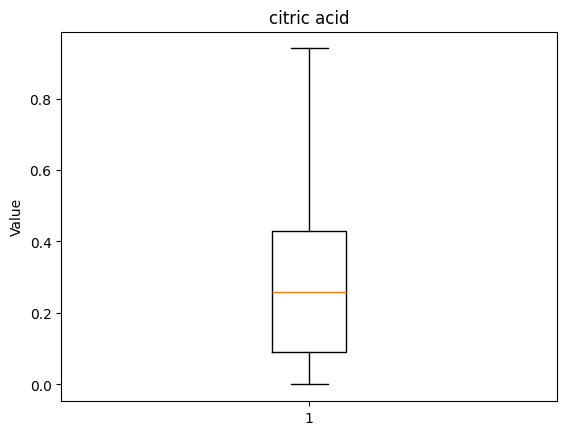

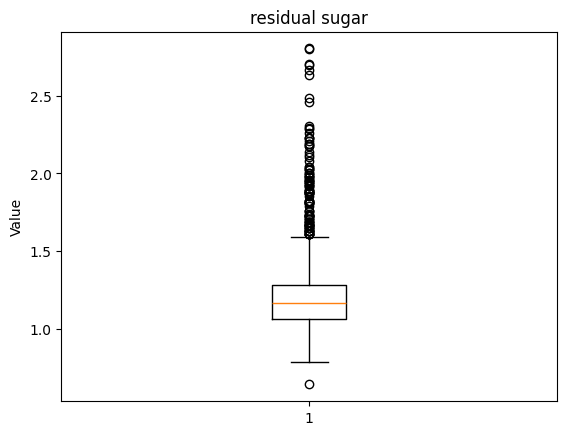

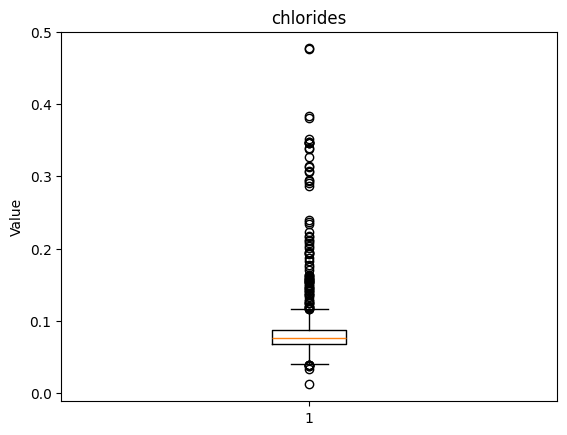

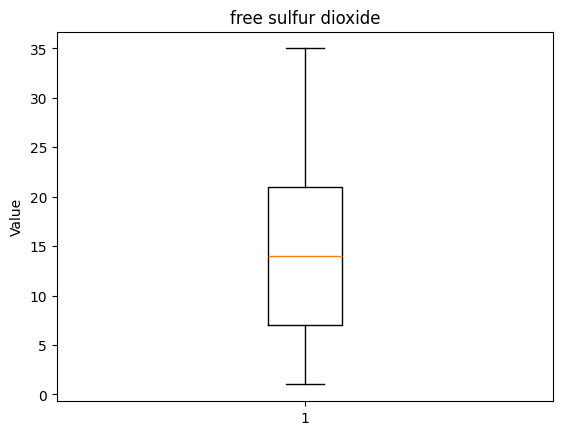

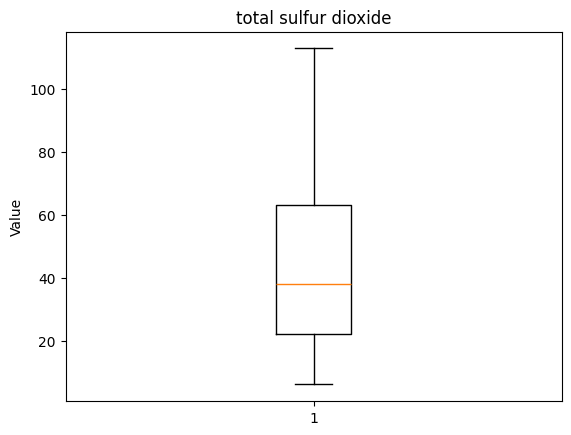

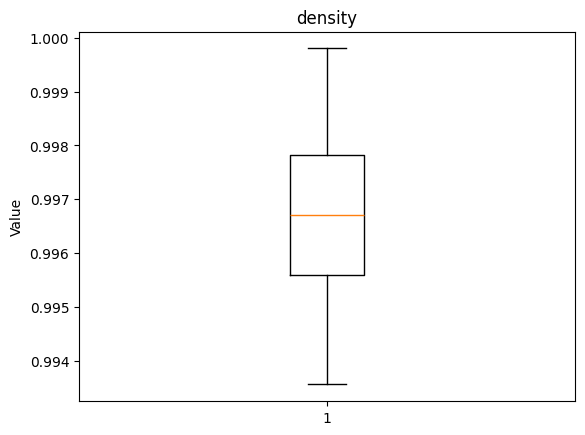

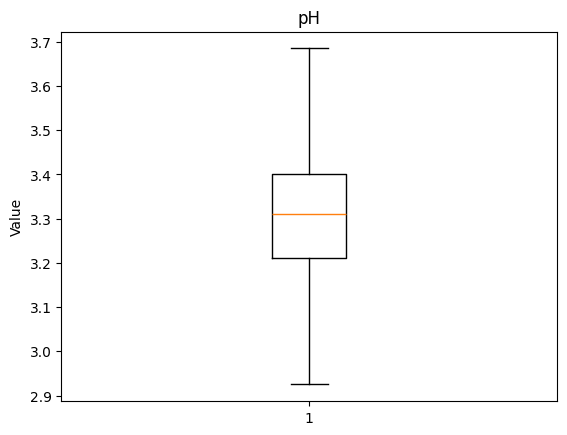

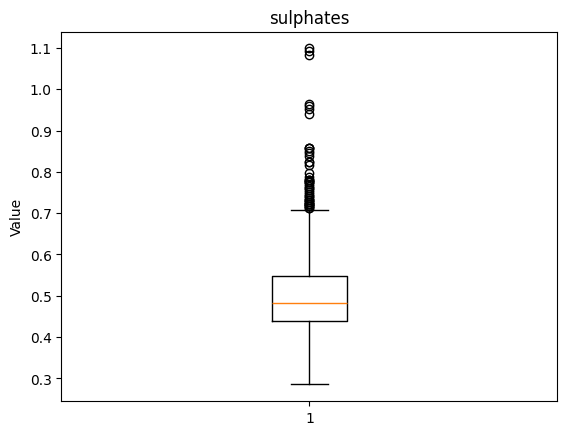

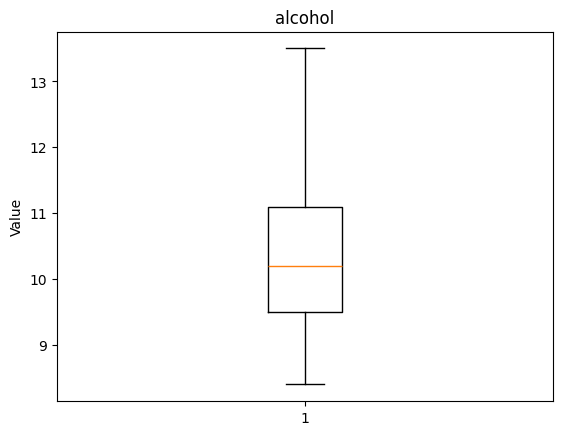

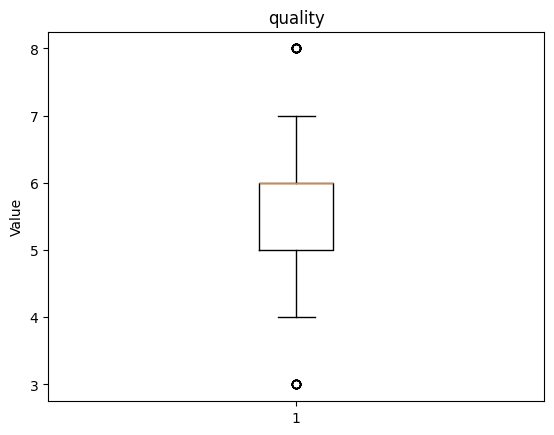

In [20]:
for i in df.columns:
  if df[i].dtype in ['int64', 'float64']:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.ylabel('Value')
    plt.show()

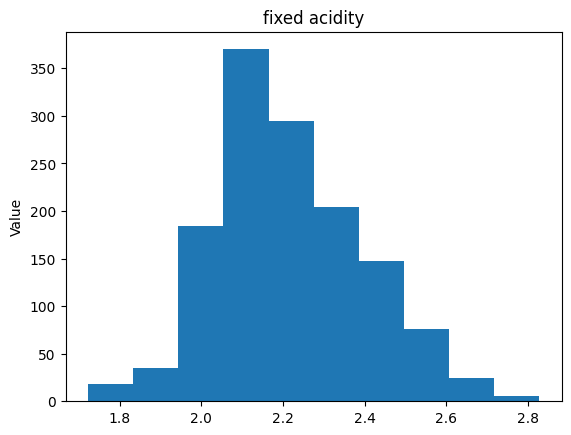

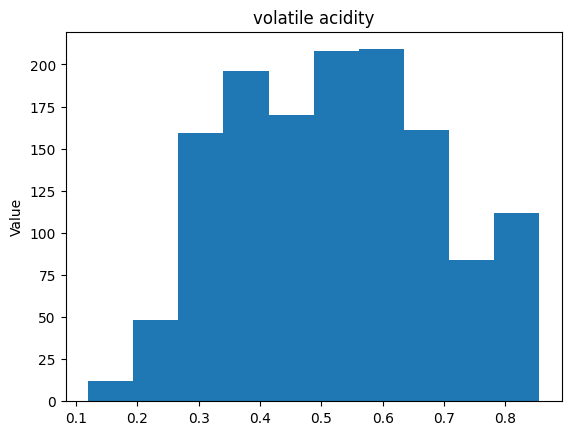

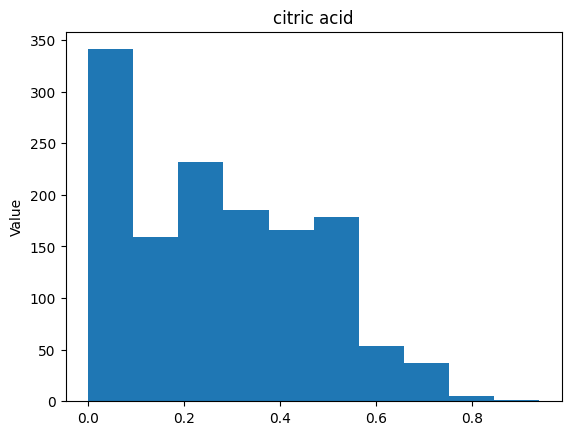

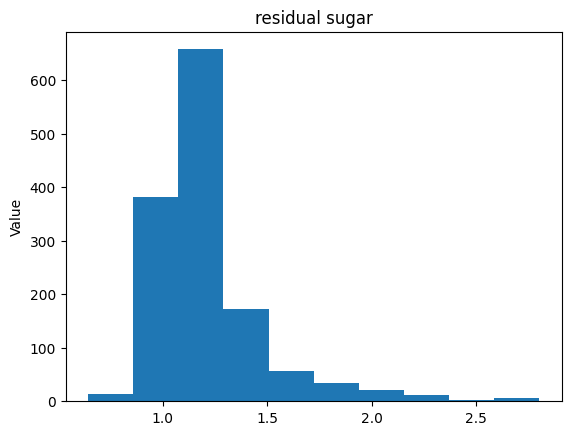

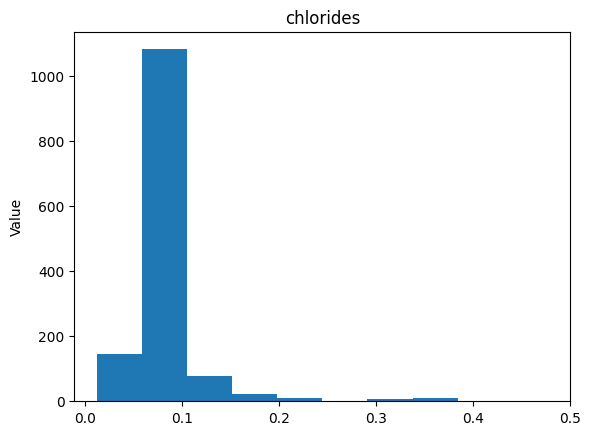

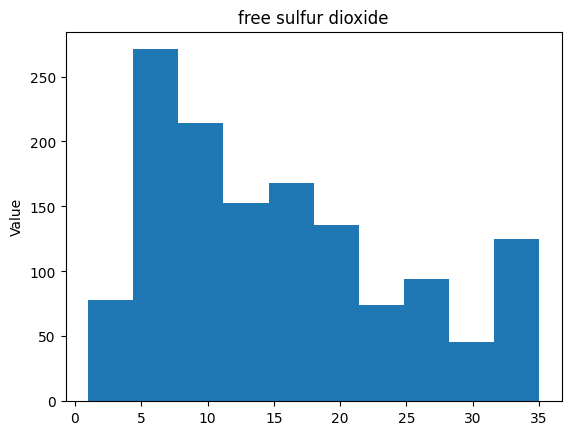

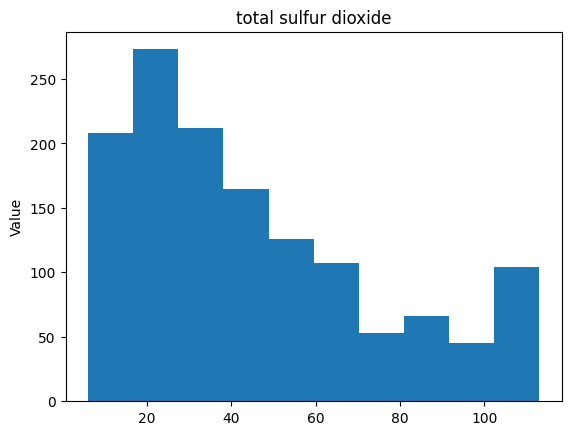

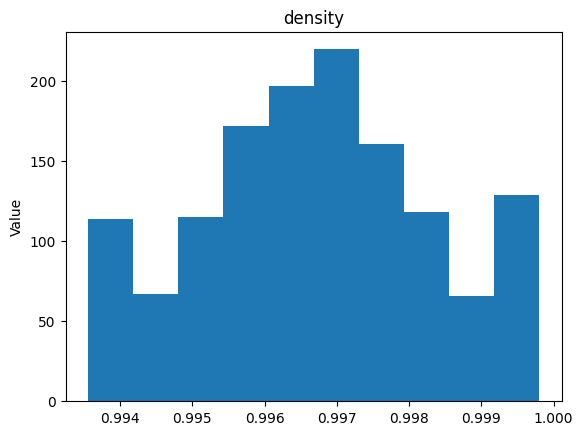

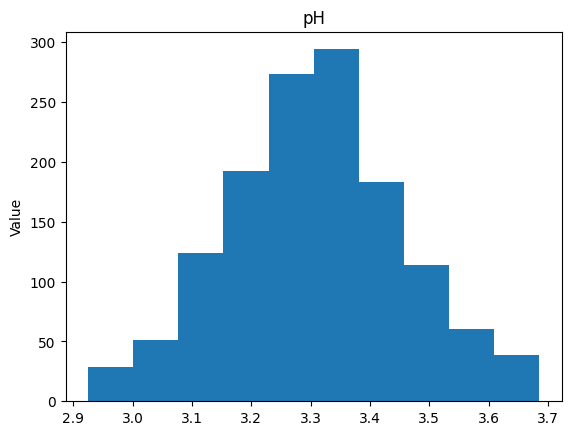

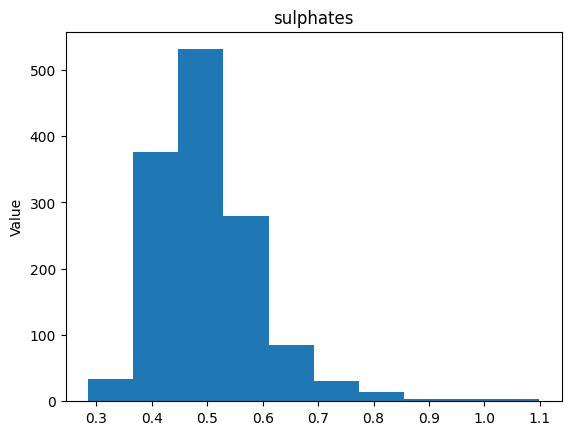

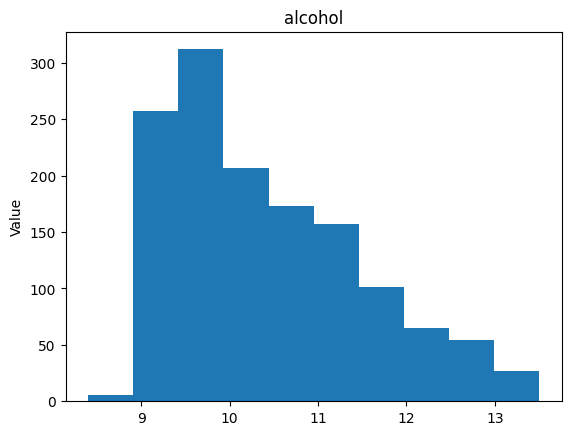

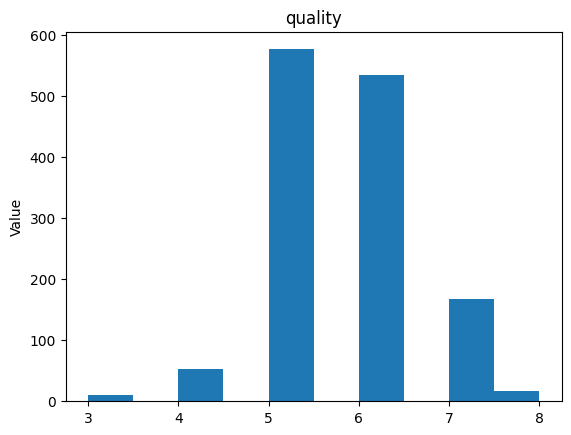

In [21]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])
    plt.title(i)
    plt.ylabel('Value')
    plt.show()

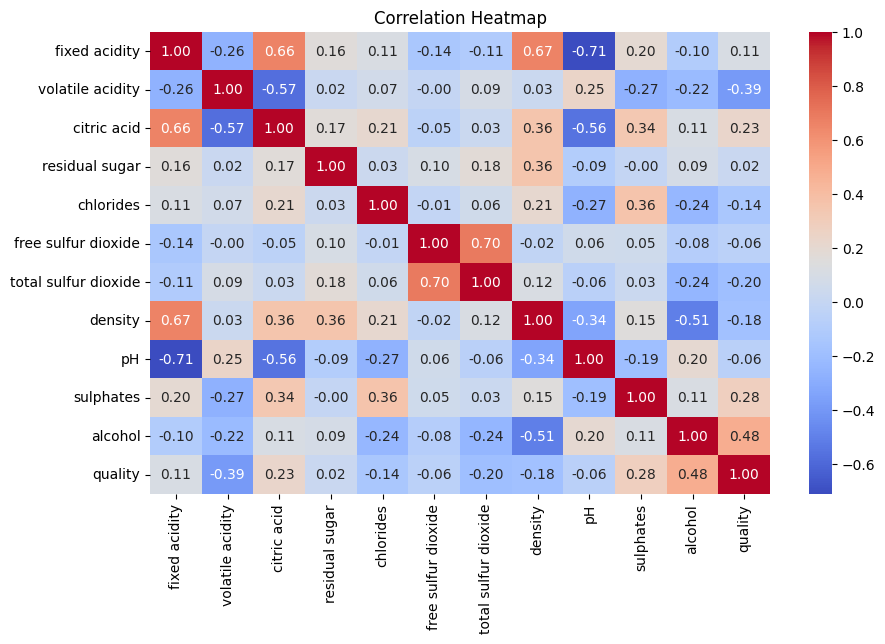

In [24]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
col_1 = ['residual sugar','alcohol','sulphates','total sulfur dioxide','free sulfur dioxide','chlorides','citric acid']
col_2 = ['volatile acidity','fixed acidity','pH','density']
scaler = MinMaxScaler()
scaler2 = StandardScaler()
df[col_1] = scaler.fit_transform(df[col_1])
df[col_2] = scaler2.fit_transform(df[col_2])

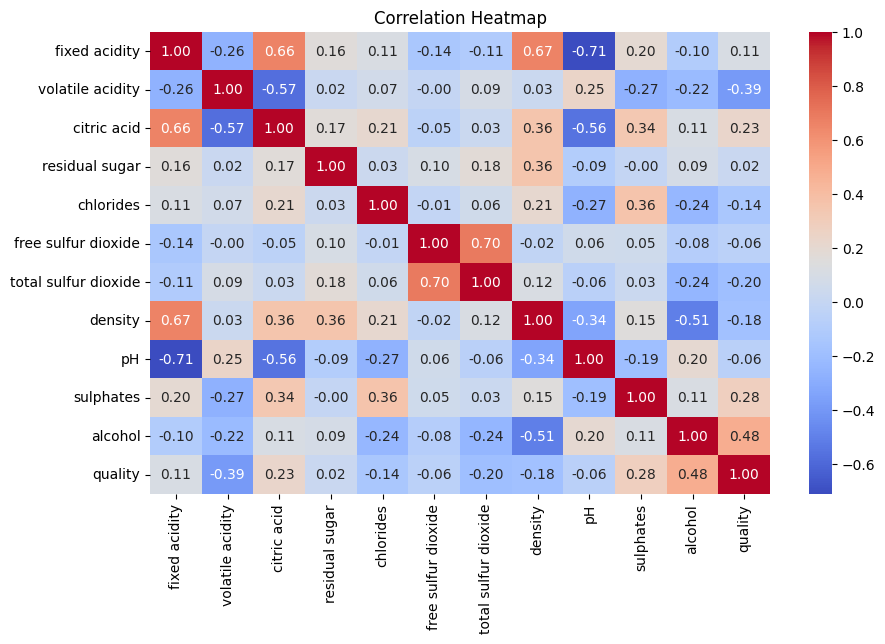

In [26]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Logistic regression is usually applied to binary classification problems. Since the quality feature contains five values, transform it into two categories (Good or Bad).
df['quality_binary'] = (df['quality'] >= 6).astype(int)  # good=1, bad=0

In [29]:
y = df['quality_binary']
x = df.drop(columns=['quality_binary','quality'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [31]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precission is',precision_score(y_test,y_pred))
print('Recall score is',recall_score(y_test,y_pred))
print('f1 score ',f1_score(y_test,y_pred) )
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.7610294117647058
precission is 0.7535211267605634
Recall score is 0.781021897810219
f1 score  0.7670250896057348
[[100  35]
 [ 30 107]]


# Multicalss logistic regression

In [32]:
X1 = df.drop("quality", axis=1)
y1 = df["quality"]


X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y
)


# Multiclass logistic transformation
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
model.fit(X1_train, y1_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [34]:
y1_pred = model.predict(X1_test)

# Evaluation
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y1_pred))

Accuracy: 0.7941176470588235

Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   0  13   0   0   0]
 [  0   0 112   0   0   0]
 [  0   0   0  97   3   0]
 [  0   0   0  31   7   0]
 [  0   0   0   4   2   0]]


In [37]:
print('precission is',precision_score(y1_test,y1_pred, average='weighted'))
print('Recall score is',recall_score(y1_test,y1_pred, average='weighted'))
print('f1 score ',f1_score(y1_test,y1_pred, average='weighted') )

precission is 0.7119540998217468
Recall score is 0.7941176470588235
f1 score  0.7308603786342123


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#KNN

In [53]:
metric_k = []
neighbors = np.arange(3,25)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1)
  classifier.fit(X1_train,y1_train)
  y2_pred = classifier.predict(X1_test)
  acc = accuracy_score(y1_test,y2_pred)
  metric_k.append(acc)

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

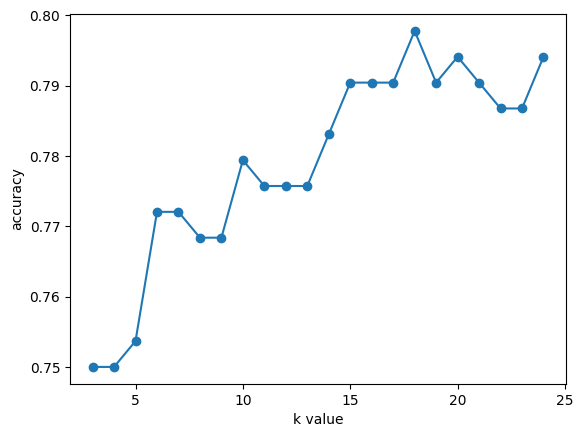

In [54]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

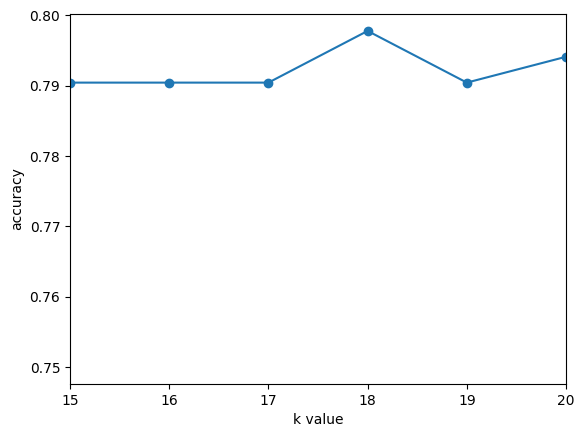

In [55]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.xlim(15,20)
plt.grid

In [56]:
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p=1)# for p=1 it metrc is not minkowski it metric is euclidean
classifier.fit(X1_train,y1_train)
y_pred = classifier.predict(X1_test)

In [57]:
print('Accuracy is',accuracy_score(y1_test,y_pred))
print('precission is',precision_score(y1_test,y_pred, average='weighted'))
print('Recall score is',recall_score(y1_test,y_pred, average='weighted'))
print('f1 score ',f1_score(y1_test,y_pred, average='weighted') )
print(confusion_matrix(y1_test,y_pred))

Accuracy is 0.7977941176470589
precission is 0.7367133552510088
Recall score is 0.7977941176470589
f1 score  0.7328702488634871
[[  0   0   3   0   0   0]
 [  0   0  12   1   0   0]
 [  0   0 112   0   0   0]
 [  0   0   0  98   2   0]
 [  0   0   0  31   7   0]
 [  0   0   0   6   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
